In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import tqdm
from sklearn.model_selection import train_test_split
import copy


In [4]:
# Load and Prepare the Data
df = pd.read_csv('Walmart.csv')
X, Y = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].to_numpy(), df['Weekly_Sales'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


In [5]:
#  Define the Neural network model
model = nn.Sequential(
    nn.Linear(5, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [6]:
# Training Loop
n_epochs = 100
batch_size = 8
batch_start = torch.arange(0, len(X_train), batch_size)

best_mse = np.inf
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = torch.sqrt(loss_fn(y_pred, y_batch))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            bar.set_postfix(mse=float(loss))

    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())


In [7]:
# Load Best Model and Print RMSE on Test Set
model.load_state_dict(best_weights)
print("RMSE on Test Set: %.2f" % np.sqrt(best_mse))

RMSE on Test Set: 610809.83


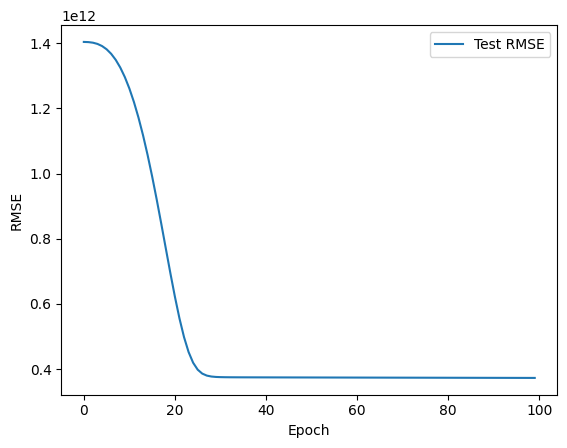

In [8]:
# Plot the training and test set RMSE history
plt.plot(history, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [9]:
# Make Predictions for Test Data
model.eval()
y_pred_test = model(X_test[:5])
for i in range(5):
    print("Actual Sales:", float(y_test[i]), "| Predicted Sales:", float(y_pred_test[i]))

Actual Sales: 1609811.75 | Predicted Sales: 1280593.875
Actual Sales: 1182490.5 | Predicted Sales: 1217593.625
Actual Sales: 1447916.25 | Predicted Sales: 771065.3125
Actual Sales: 1429954.625 | Predicted Sales: 780118.1875
Actual Sales: 557543.625 | Predicted Sales: 1067909.75


In [10]:
X_new = torch.tensor([[1, 70, 3.50, 220, 7.5]], dtype=torch.float32)
y_pred_new = model(X_new)
print("Predicted Sales for New Data:", float(y_pred_new))

Predicted Sales for New Data: 1226790.125


In [11]:
num_lines_test_set = len(X_test)
print("Number of lines in the test set:", num_lines_test_set)

Number of lines in the test set: 1931


In [12]:
num_lines_train_set = len(X_train)
print("Number of lines in the training set:", num_lines_train_set)

Number of lines in the training set: 4504
